<a href="https://colab.research.google.com/github/hammadnajeeb123/Pinnacle-Full-Stack-datascience-intern/blob/main/Customer_Segmentation_for_E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import joblib

In [6]:
# Load dataset from Kaggle
# Note: Make sure to upload the Kaggle API JSON file in Colab
from google.colab import files
files.upload()

Saving E-commerce Customer Behavior - Sheet1.csv to E-commerce Customer Behavior - Sheet1.csv


{'E-commerce Customer Behavior - Sheet1.csv': b'Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level\r\n101,Female,29,New York,Gold,1120.2,14,4.6,TRUE,25,Satisfied\r\n102,Male,34,Los Angeles,Silver,780.5,11,4.1,FALSE,18,Neutral\r\n103,Female,43,Chicago,Bronze,510.75,9,3.4,TRUE,42,Unsatisfied\r\n104,Male,30,San Francisco,Gold,1480.3,19,4.7,FALSE,12,Satisfied\r\n105,Male,27,Miami,Silver,720.4,13,4,TRUE,55,Unsatisfied\r\n106,Female,37,Houston,Bronze,440.8,8,3.1,FALSE,22,Neutral\r\n107,Female,31,New York,Gold,1150.6,15,4.5,TRUE,28,Satisfied\r\n108,Male,35,Los Angeles,Silver,800.9,12,4.2,FALSE,14,Neutral\r\n109,Female,41,Chicago,Bronze,495.25,10,3.6,TRUE,40,Unsatisfied\r\n110,Male,28,San Francisco,Gold,1520.1,21,4.8,FALSE,9,Satisfied\r\n111,Male,32,Miami,Silver,690.3,11,3.8,TRUE,34,Unsatisfied\r\n112,Female,36,Houston,Bronze,470.5,7,3.2,FALSE,20,Neutral\r\n113,Female,30,New York,Gold,1200.8,16,4.3

In [7]:
# Load the data into a pandas DataFrame
data = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')
data.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [8]:
# Step 2: Data Preprocessing

# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())


Missing values in each column:
 Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64


In [9]:
# Drop rows with missing values (if any)
data.dropna(inplace=True)

In [10]:
# Display data types and unique values in each column
print("Data types and unique values:\n", data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 30.2+ KB
Data types and unique values:
 None


In [11]:
# Encoding categorical columns if needed (assuming no categorical encoding is required based on the dataset description)

# Select numerical columns for scaling
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_cols])

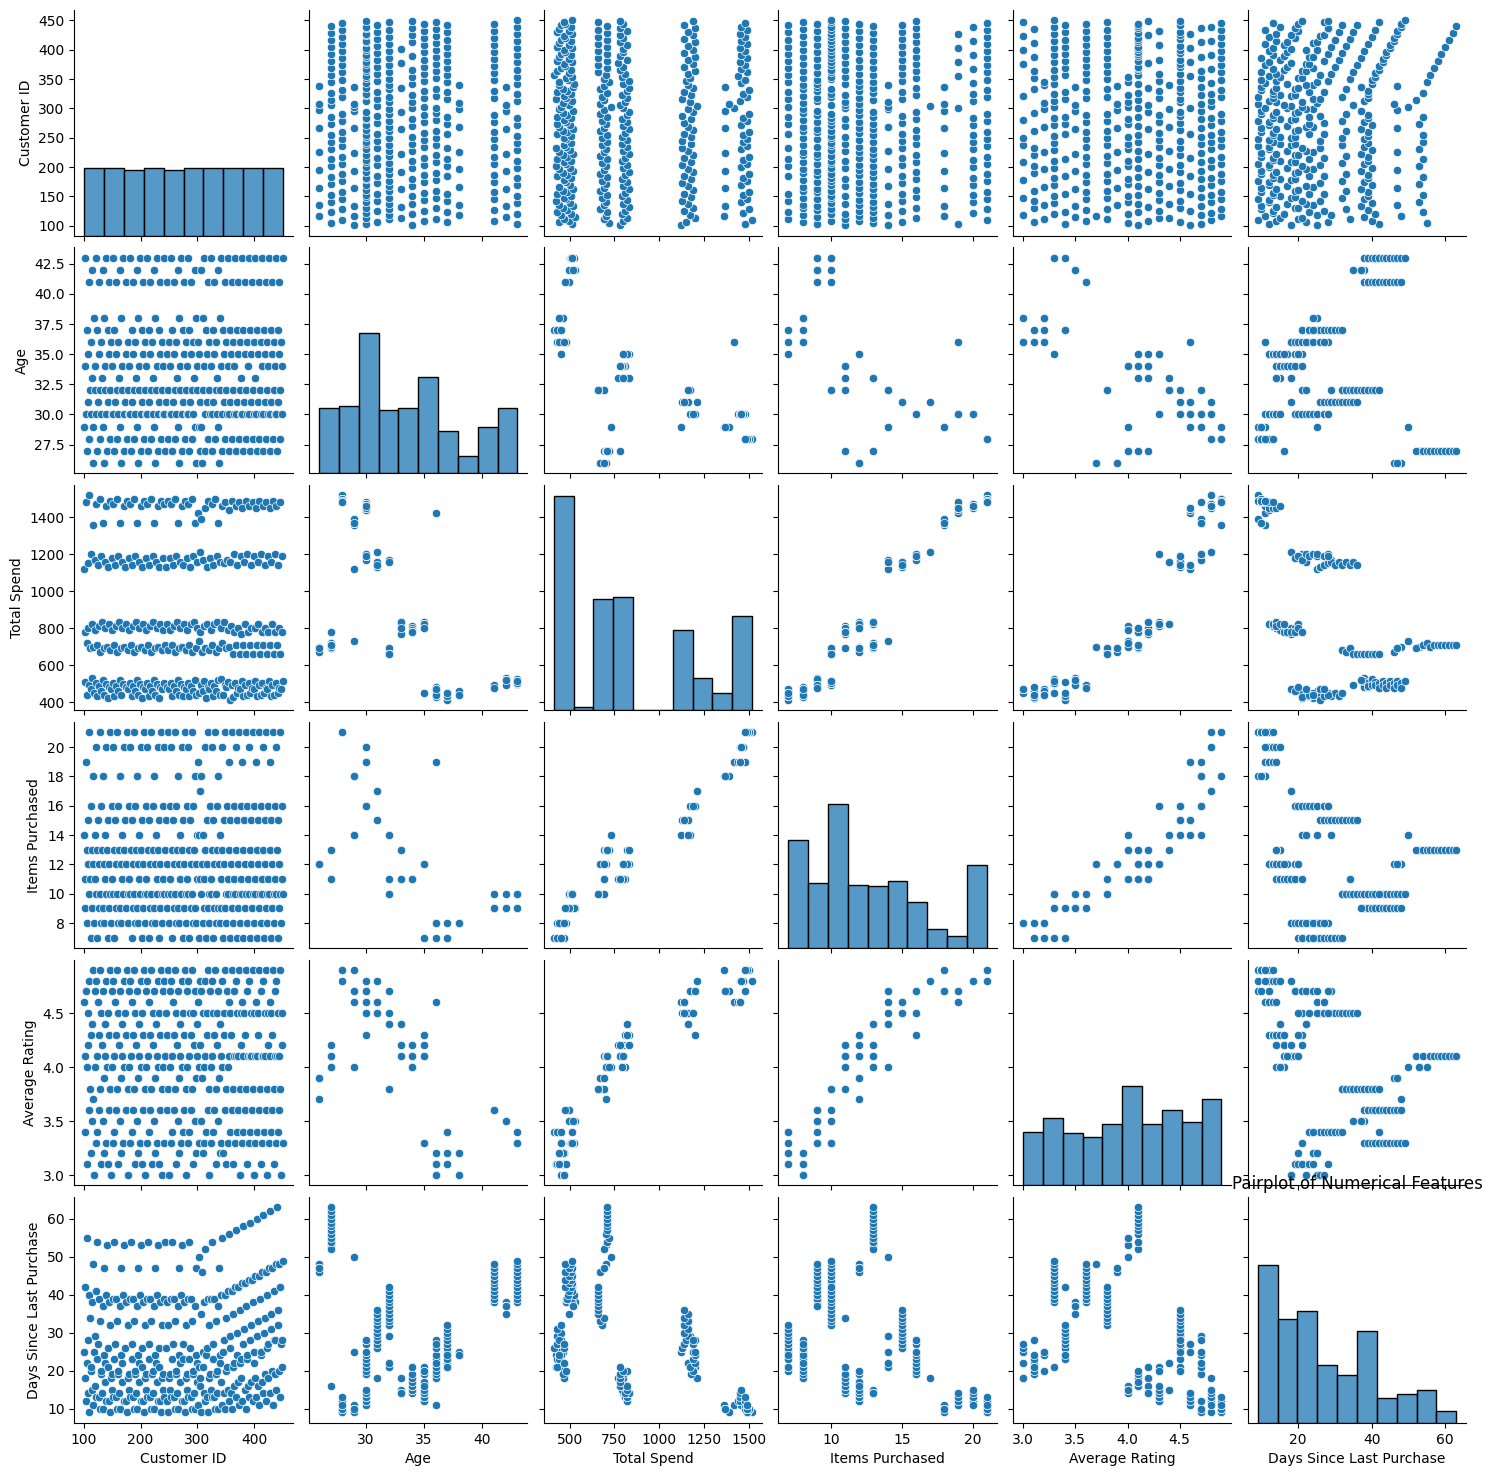

In [12]:
# Step 3: Exploratory Data Analysis (EDA)

# Pairplot to visualize relationships between numerical features
sns.pairplot(data[numerical_cols])
plt.title('Pairplot of Numerical Features')
plt.show()

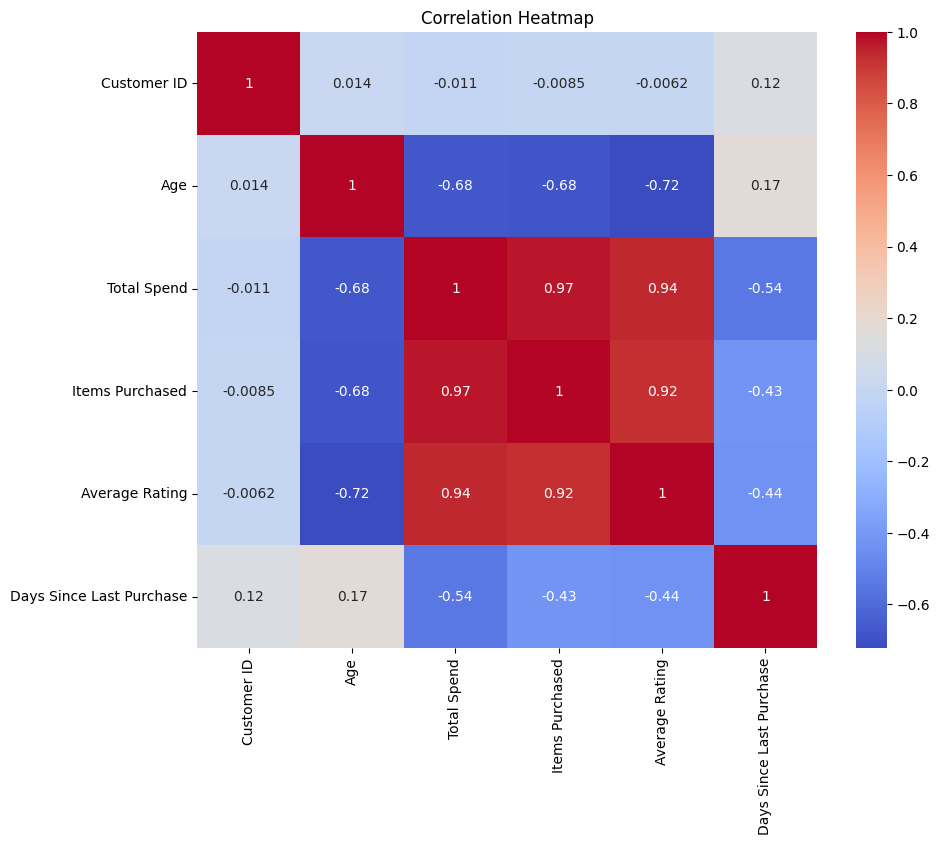

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [14]:
# Step 4: Clustering with K-Means

# Finding the optimal number of clusters using the Elbow method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

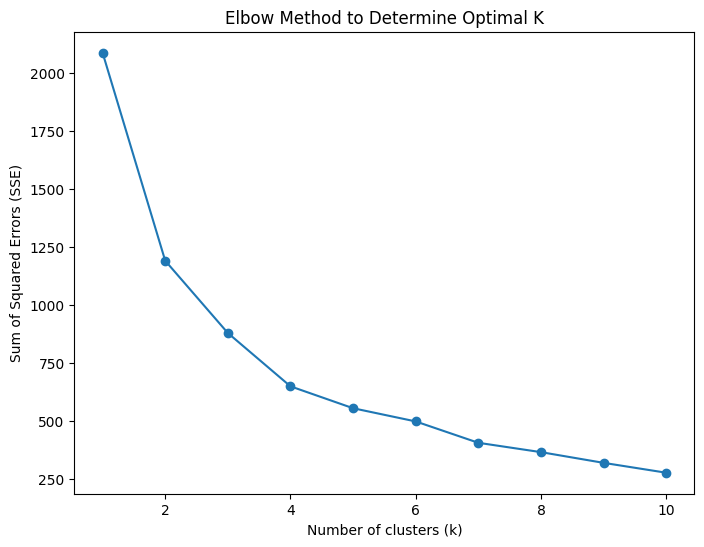

In [15]:
# Plotting the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [16]:

# From the elbow plot, let's choose 4 as the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

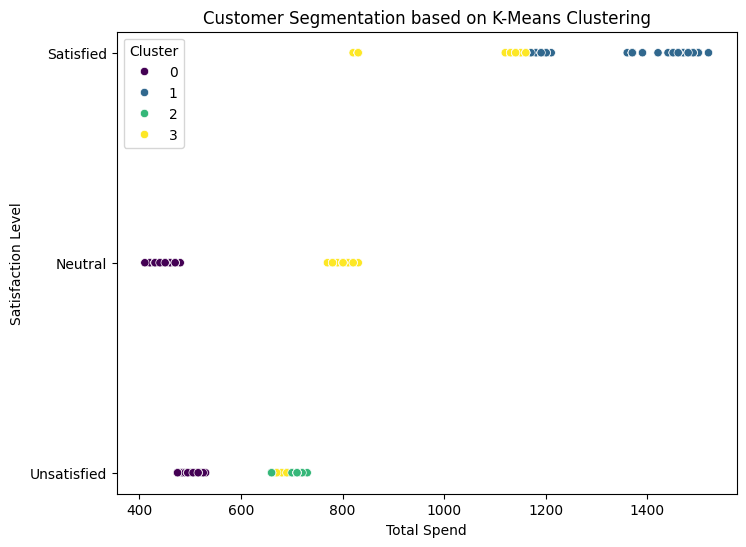

In [21]:
# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total Spend', y='Satisfaction Level', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation based on K-Means Clustering')
plt.xlabel('Total Spend')
plt.ylabel('Satisfaction Level')
plt.legend(title='Cluster')
plt.show()

In [22]:
# Step 7: Principal Component Analysis (PCA) for Visualization
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]

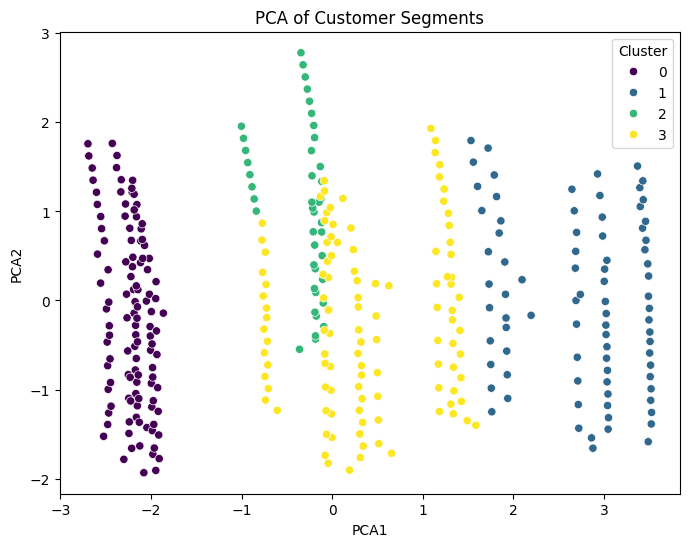

In [23]:
# Visualizing PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('PCA of Customer Segments')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

In [24]:
# Step 8: Saving the Model for Future Use

# Save the model and scaler
joblib.dump(kmeans, 'kmeans_customer_segmentation.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [29]:
def predict_customer_segment(new_data):
    """
    Predict the customer segment based on new input data.
    Args:
    - new_data (pd.DataFrame): New customer data containing the same columns as the original data.

    Returns:
    - cluster (int): Predicted customer segment.
    """
    model = joblib.load('kmeans_customer_segmentation.pkl')
    scaler = joblib.load('scaler.pkl')

    # Preprocess the input data
    scaled_data = scaler.transform(new_data)

     # Predict the cluster
    cluster = model.predict(scaled_data)

    return cluster

In [41]:
# Step 9: Function for Future Predictions

def predict_customer_segment(new_data):
    """
    Predict the customer segment based on new input data.
    Args:
    - new_data (pd.DataFrame): New customer data containing the same columns as the original data.

    Returns:
    - cluster (int): Predicted customer segment.
    """
    model = joblib.load('kmeans_customer_segmentation.pkl')
    scaler = joblib.load('scaler.pkl')

    # Get the columns used during fitting
    scale_cols = scaler.feature_names_in_

    # Ensure that new_data has only the columns used in scaling (scale_cols) and in the correct order
    new_data_scaled = new_data[scale_cols]

    # Preprocess the input data using the scaler
    scaled_data = scaler.transform(new_data_scaled)

    # Predict the cluster
    cluster = model.predict(scaled_data)

    return cluster

# Create a template for example data
template_data = data.drop(columns=['Cluster', 'PCA1', 'PCA2']).iloc[0:1].copy()

# Update example data with specific values while keeping other columns with default values
example_data = template_data.copy()
# Make sure you are updating the correct columns used during model training
example_data['Age'] = 35
example_data['Average Rating'] = 4.5

# Predict using the updated example data
print(f"Predicted Customer Segment: {predict_customer_segment(example_data)}")

Predicted Customer Segment: [3]
